<a href="https://colab.research.google.com/github/chaseScallons/Regression-Analysis-Test/blob/main/Regression_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Import dependencies
import tensorflow as tf         # Model Implementation
#import numpy as np              # Linear Algebra
import matplotlib.pyplot as plt # Visualization
print(tf.__version__)

2.9.2


In [61]:
# Initialize feature space
X = tf.range(-100, 100, 4)

# Initialize label space
y = X + 10

# Cross-validation
X_train = X[:40] # First 40 samples are training samples --> %80 of data
y_train = y[:40]

X_test = X[40:]  # Last 10 samples are testing samples --> %20 of data
y_test = y[40:]


TensorShape([40])

# Building the ML model


In [66]:
# 1. Create the model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 Hidden layer, 1 Neuron
])

In [67]:
from tensorflow.python import metrics

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,            # Loss function is Mean Absolute Error (On average how wrong are the predictions?)
              optimizer=tf.keras.optimizers.SGD(), # Optimizer is Stochtastic Gradient Descent
              metrics=["mae"]) 

In [90]:
from os import name
# Summary of the model
tf.random.set_seed(54)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Regression_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

# Dense == Fully connected
# Trainable Params == X, y

Model: "Regression_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 3. Fitting the model to data  
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # Train model on data for 50 cycles
                                                                            # Verbose hides fitting

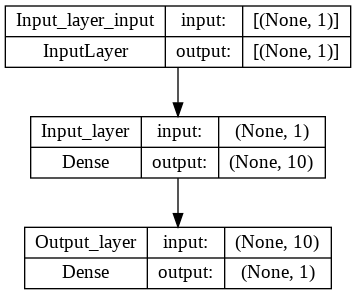

In [92]:
# Visualization of the models layers
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

# Visualization of the models predictions



In [96]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 61ms/step


array([[17.909472],
       [19.016768],
       [20.124062],
       [21.231358],
       [22.338654],
       [23.445951],
       [24.553247],
       [25.66054 ],
       [26.767838],
       [27.875132]], dtype=float32)

In [99]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  # Visualize split datasets
  plt.figure(figsize=(10, 7))

  # Training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

  # Testing data in red
  plt.scatter(test_data, test_labels, c="r", label="Testing Data")

  # Plot predictons in green
  plt.scatter(test_data, predictions, c="g", label="Predictions")

  # Legend
  plt.legend()

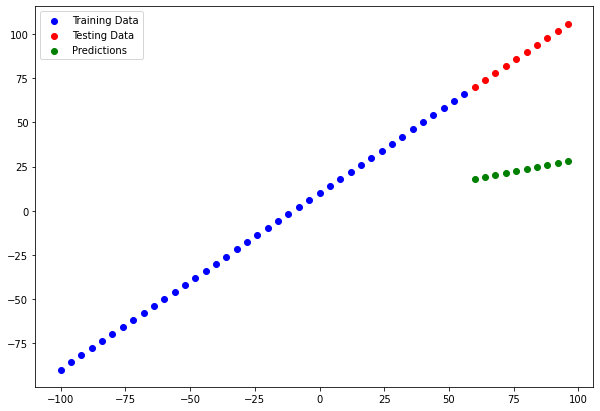

In [100]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)